In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from env import get_url
import wrangle_zillow

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Data Wrangling

## Zillow Data

### Acquire

#### Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

* #### Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.

* #### Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.

* #### Only include properties that include a latitude and longitude value.

In [2]:
query = '''
SELECT prop.*, 
       pred1.logerror, 
       pred1.transactiondate, 
       air.airconditioningdesc, 
       arch.architecturalstyledesc, 
       build.buildingclassdesc, 
       heat.heatingorsystemdesc, 
       landuse.propertylandusedesc, 
       story.storydesc, 
       construct.typeconstructiondesc 
FROM   properties_2017 prop 
       LEFT JOIN predictions_2017 pred1 USING (parcelid) 
       INNER JOIN (SELECT parcelid, 
                          Max(transactiondate) maxtransactiondate 
                   FROM   predictions_2017 
                   GROUP  BY parcelid) pred2 
               ON pred1.parcelid = pred2.parcelid 
                  AND pred1.transactiondate = pred2.maxtransactiondate 
       LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
       LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
       LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
       LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
       LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
       LEFT JOIN storytype story USING (storytypeid) 
       LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
WHERE  prop.latitude IS NOT NULL 
	   AND prop.longitude IS NOT NULL; 
'''

url = get_url('zillow')

zillow = pd.read_sql(query, url)
zillow

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,None,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,None,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,None,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,None,NaN,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,NaN,1286.0,1286.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34245368.0,-118282383.0,47405.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE40,6.037101e+07,12447.0,3101.0,27328.0,96284.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,None,NaN,6.037101e+13,0.020615,2017-09-20,None,None,None,Central,Single Family Residential,None,None
77377,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,NaN,1612.0,1612.0,1612.0,NaN,NaN,1612.0,NaN,6111.0,1.0,2.0,2

#### Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [3]:
zillow.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,7.738100e+04,7.738100e+04,24953.000000,206.000000,50.000000,77381.000000,77381.000000,15.000000,49672.000000,76772.000000,614.0,6023.000000,77185.000000,73749.000000,41.000000,3009.000000,6023.000000,386.000000,77381.000000,8276.000000,76772.000000,25474.000000,25474.000000,1538.0,49440.000000,7.738100e+04,7.738100e+04,6.914200e+04,16137.0,867.000000,464.0,1074.0,15042.0,77381.000000,7.738100e+04,75910.000000,77381.000000,30890.000000,77331.000000,77381.000000,50.0,10096.000000,222.000000,50563.000000,2388.000000,70.000000,77118.000000,17560.000000,172.0,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000
mean,1.495139e+06,1.300715e+07,1.813289,7.388350,679.720000,2.299130,3.053489,3.933333,6.534587,2.316867,66.0,1366.512535,1785.219939,1760.522543,1389.853659,2357.791625,1381.771542,2082.500000,6048.819232,1.191155,2.250482,1.815459,350.111957,1.0,3.920510,3.400837e+07,-1.182036e+08,2.996928e+04,1.0,517.916955,1.0,1.0,1.0,261.826340,6.049129e+07,33671.242708,2534.158333,187734.864066,96587.086822,1.476952,7.0,1.009608,6.040541,1.110021,305.411223,216.385714,1968.635831,1.434738,1.0,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,0.016625
std,8.609071e+05,3.481346e+06,2.967894,2.734542,689.703546,0.996651,1.139096,0.258199,1.721953,0.979755,0.0,671.308125,954.049286,934.024340,123.531688,1188.775210,726.468878,1240.382784,20.748199,0.491080,0.966552,0.588345,261.681641,0.0,3.592779,2.653888e+05,3.594826e+05,1.233711e+05,0.0,156.716017,0.0,0.0,0.0,5.141199,2.059052e+05,47169.815982,801.593352,165118.791740,3798.347098,2.824386,0.0,0.118630,0.557285,1.171154,238.392793,190.177514,23.786032,0.544569,0.0,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,0.170191
min,3.490000e+02,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,66.0,44.000000,128.000000,128.000000,1056.000000,598.000000,44.000000,380.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000,3.333953e+07,-1.194754e+08,2.360000e+02,1.0,24.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,11.000000,12.000000,1824.000000,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,7.520700e+05,1.153830e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,66.0,955.000000,1182.000000,1172.000000,1344.000000,1625.000000,956.000000,993.750000,6037.000000,1.000000,2.000000,2.000000,0.000000,1.0,2.000000,3.381457e+07,-1.184153e+08,5.700000e+03,1.0,424.000000,1.0,1.0,1.0,261.000000,6.037311e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,170.000000,61.500000,1953.000000,1.000000,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,-0.024377
50%,1.497932e+06,1.253157e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,2.000000,66.0,1257.000000,1543.000000,1523.000000,1440.000000,2094.000

In [4]:
zillow.describe(include='object')

,propertycountylandusecode,propertyzoningdesc,taxdelinquencyflag,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
count,77381,50331,2886,77381,24953,206,15,49440,77381,50,222
unique,75,1907,1,265,5,5,2,10,13,1,4
top,0100,LAR1,Y,2017-06-30,Central,Contemporary,Buildings having wood or wood and steel frames,Central,Single Family Residential,Basement,Frame
freq,26714,6747,2886,1189,23133,172,14,33550,52320,50,219


In [5]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 68 columns):
id                              77381 non-null int64
parcelid                        77381 non-null int64
airconditioningtypeid           24953 non-null float64
architecturalstyletypeid        206 non-null float64
basementsqft                    50 non-null float64
bathroomcnt                     77381 non-null float64
bedroomcnt                      77381 non-null float64
buildingclasstypeid             15 non-null float64
buildingqualitytypeid           49672 non-null float64
calculatedbathnbr               76772 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6023 non-null float64
calculatedfinishedsquarefeet    77185 non-null float64
finishedsquarefeet12            73749 non-null float64
finishedsquarefeet13            41 non-null float64
finishedsquarefeet15            3009 non-null float64
finishedsquarefeet50          

In [6]:
zillow.dtypes

id                                int64
parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                  float64
heatingorsystemtypeid           float64


In [7]:
zillow.shape

(77381, 68)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/anaconda3/lib/python3.7/site-package

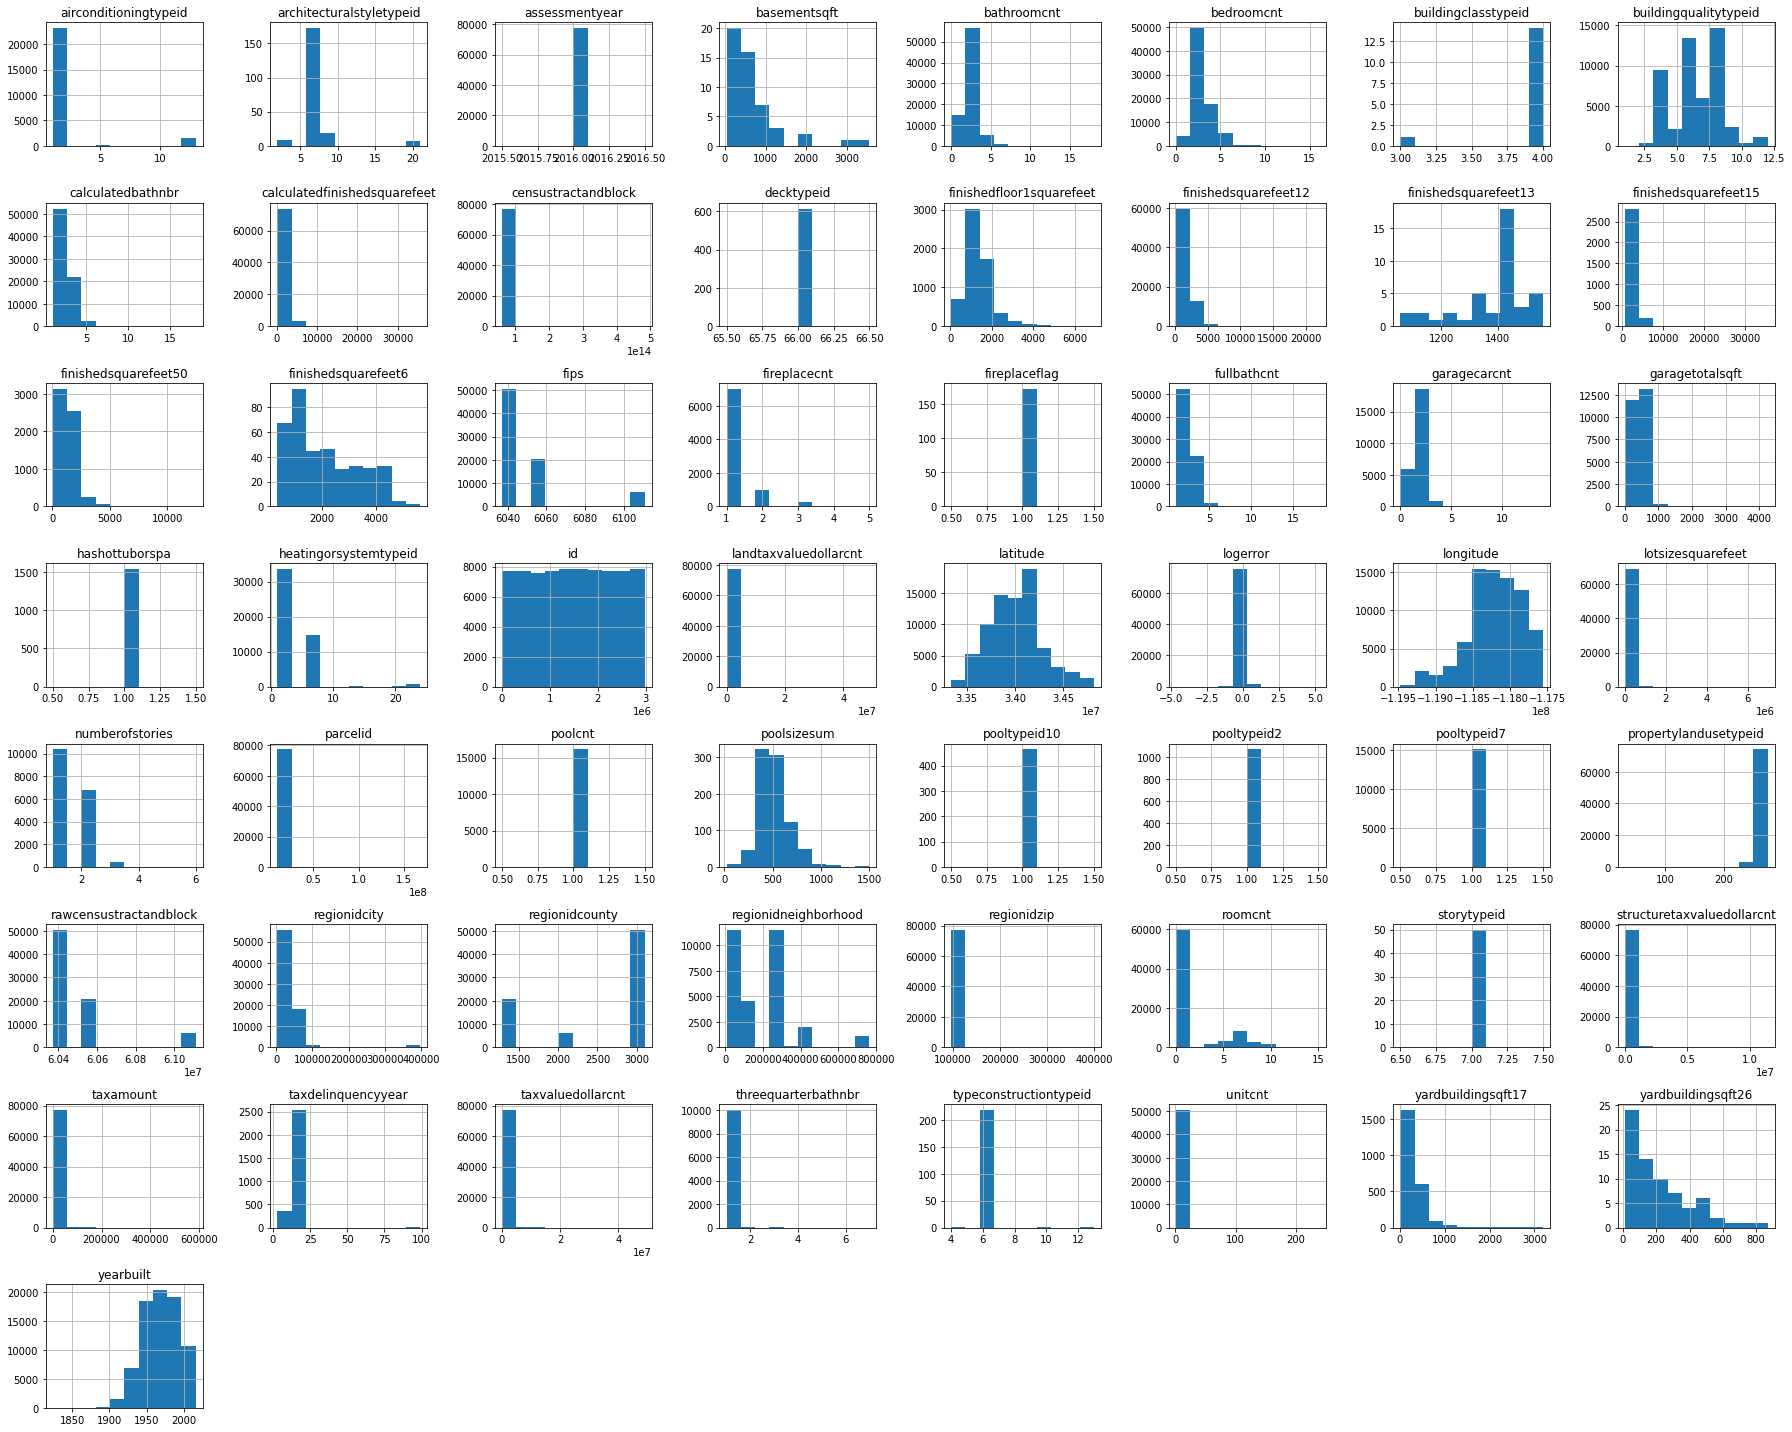

In [8]:
zillow.hist(figsize=(25 ,20))
plt.tight_layout()

#### Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [9]:
def measure_na(df):
    na_df = pd.DataFrame(df.isna().sum(), columns=['num_na_rows'])
    na_df['pct_na_rows'] = df.isna().sum()/len(df.index)
    return na_df

In [10]:
measure_na(zillow)

,num_na_rows,pct_na_rows
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52428,0.677531
architecturalstyletypeid,77175,0.997338
basementsqft,77331,0.999354
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingclasstypeid,77366,0.999806
buildingqualitytypeid,27709,0.358085
calculatedbathnbr,609,0.007870


#### Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [11]:
def measure_na_rows(df):
    na_row_df = pd.DataFrame(df.isna().sum(axis=1).value_counts(sort=False), 
                      columns=['num_rows'])
    na_row_df = na_row_df.reset_index()
    na_row_df = na_row_df.rename(columns={'index': 'num_col_missing'})
    na_row_df['pct_cols_missing'] = na_row_df.num_col_missing / len(df.columns.tolist())
    return na_row_df

In [12]:
measure_na_rows(zillow)

,num_col_missing,num_rows,pct_cols_missing
0,23,2,0.338235
1,24,13,0.352941
2,25,24,0.367647
3,26,65,0.382353
4,27,316,0.397059
5,28,455,0.411765
6,29,5270,0.426471
7,30,3455,0.441176
8,31,9891,0.455882
9,32,12579,0.470588


#### Now lets take both of those previous functions and add them to a wrangle file

In [13]:
zillow = wrangle_zillow.get_zillow_data()

In [14]:
wrangle_zillow.measure_na_columns(zillow)

,num_na_rows,pct_na_rows
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52428,0.677531
architecturalstyletypeid,77175,0.997338
basementsqft,77331,0.999354
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingclasstypeid,77366,0.999806
buildingqualitytypeid,27709,0.358085
calculatedbathnbr,609,0.007870


In [15]:
wrangle_zillow.measure_na_rows(zillow)

,num_col_missing,num_rows,pct_cols_missing
0,23,2,0.338235
1,24,13,0.352941
2,25,24,0.367647
3,26,65,0.382353
4,27,316,0.397059
5,28,455,0.411765
6,29,5270,0.426471
7,30,3455,0.441176
8,31,9891,0.455882
9,32,12579,0.470588


### Prepare

#### Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [16]:
zillow = zillow[zillow.propertylandusetypeid.isin([261, 262, 263, 264, 266, 268, 273, 276, 279])]
zillow

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,None,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,None,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,None,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,None,NaN,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,NaN,1286.0,1286.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34245368.0,-118282383.0,47405.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE40,6.037101e+07,12447.0,3101.0,27328.0,96284.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,None,NaN,6.037101e+13,0.020615,2017-09-20,None,None,None,Central,Single Family Residential,None,None
77377,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,NaN,1612.0,1612.0,1612.0,NaN,NaN,1612.0,NaN,6111.0,1.0,2.0,2

#### Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row)

In [17]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

#### Decide how to handle the remaining missing values:

In [26]:
zillow = wrangle_zillow.prep_zillow(cols_to_remove=['buildingqualitytypeid'])
zillow

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,NaN,33634931.0,-117869207.0,4506.0,122,261.0,None,6.059063e+07,53571.0,1286.0,96978.0,0.0,NaN,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,None,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,NaN,34449266.0,-119281531.0,12647.0,1110,261.0,None,6.111001e+07,13091.0,2061.0,97099.0,5.0,NaN,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,None,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,NaN,33886168.0,-117823170.0,8432.0,122,261.0,None,6.059022e+07,21412.0,1286.0,97078.0,6.0,NaN,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,None,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,2.0,34245180.0,-118240722.0,13038.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,96330.0,0.0,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
4,1970746,10887214,3.0,3.0,3.0,1312.0,1312.0,6037.0,3.0,2.0,34185120.0,-118414640.0,278581.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,96451.0,0.0,1.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Central,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,673515,11000655,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,2.0,34245368.0,-118282383.0,47405.0,0100,261.0,LARE40,6.037101e+07,12447.0,3101.0,96284.0,0.0,1.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Central,Single Family Residential
77377,2968375,17239384,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,NaN,34300140.0,-118706327.0,12105.0,1111,261.0,None,6.111008e+07,27110.0,2061.0,97116.0,7.0,NaN,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,None,Single Family Residential
77378,1843709,12773139,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,2.0,34040895.0,-118038169.0,5074.0,0100,261.0,SER1*,6.037434e+07,36502.0,3101.0,96480.0,0.0,1.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Central,Single Family Residential
77379,1187175,12826780,2.0,3.0,2.0,1762.0,1762.0,6037.0,2.0,2.0,33937685.0,-117996709.0,6347.0,0100,261.0,WHR16000*,6.037503e+07,14634.0,3101.0,96171.0,0.0,1.0,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25,Central,Single Family Residential


In [27]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71560 entries, 0 to 77380
Data columns (total 33 columns):
id                              71560 non-null int64
parcelid                        71560 non-null int64
bathroomcnt                     71560 non-null float64
bedroomcnt                      71560 non-null float64
calculatedbathnbr               71473 non-null float64
calculatedfinishedsquarefeet    71539 non-null float64
finishedsquarefeet12            71360 non-null float64
fips                            71560 non-null float64
fullbathcnt                     71473 non-null float64
heatingorsystemtypeid           46561 non-null float64
latitude                        71560 non-null float64
longitude                       71560 non-null float64
lotsizesquarefeet               63512 non-null float64
propertycountylandusecode       71560 non-null object
propertylandusetypeid           71560 non-null float64
propertyzoningdesc              45343 non-null object
rawcensustractand

In [ ]:
zillow.bathroomcnt == zillow